# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 22.2 MB/s 
     |████████████████████████████████| 9.8 MB 33.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
import warnings
warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('/content/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


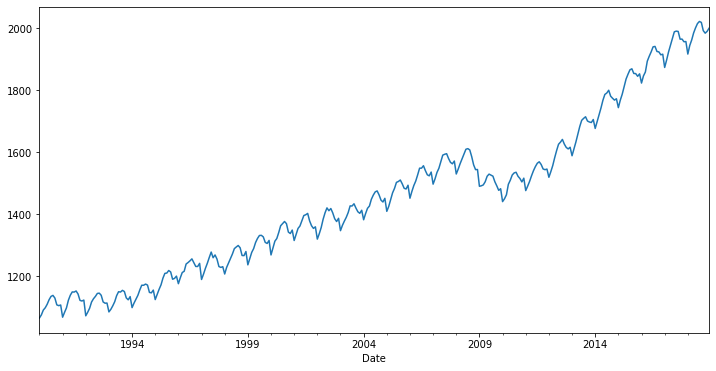

In [ ]:
## Постройте график атрибута 'Employees'

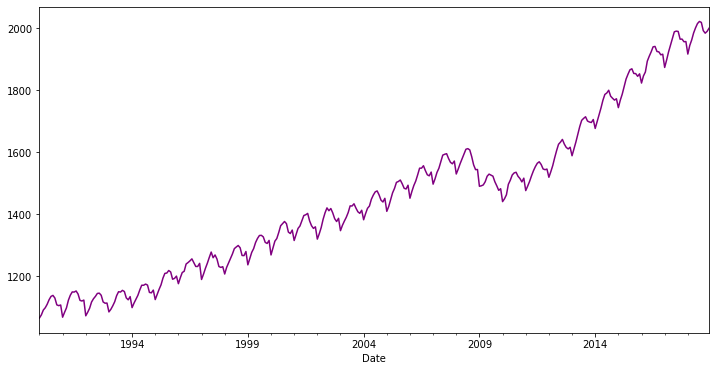

In [8]:
## График атрибута 'Employees' построен
df1=df['Employees'].plot(figsize=(12,6), color='purple')
df1.autoscale(axis='x', tight=True)

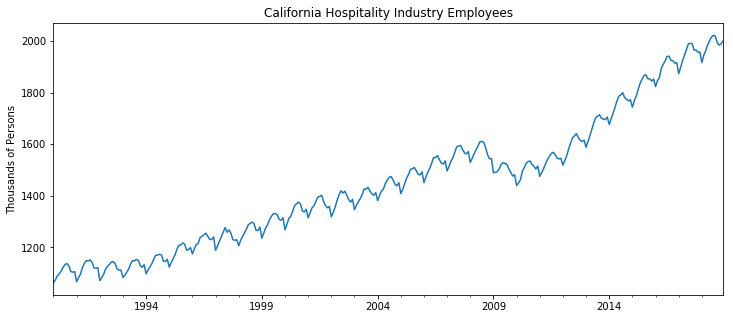

In [ ]:
# добавьте заголовок и подписи

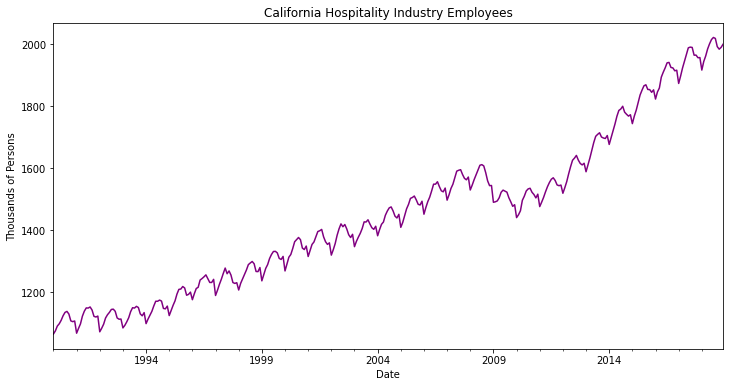

In [9]:
# Заголовок и подписи добавлены
df1=df['Employees'].plot(figsize=(12,6), title='California Hospitality Industry Employees', ylabel='Thousands of Persons', color='purple')
df1.autoscale(axis='x', tight=True)

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').
Подсказка: функция seasonal_decompose

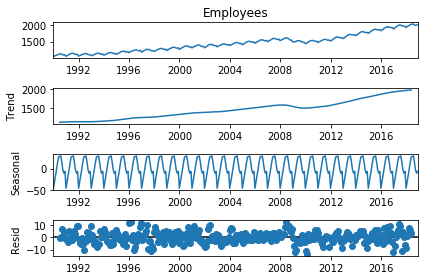

In [ ]:
# отобразите результат

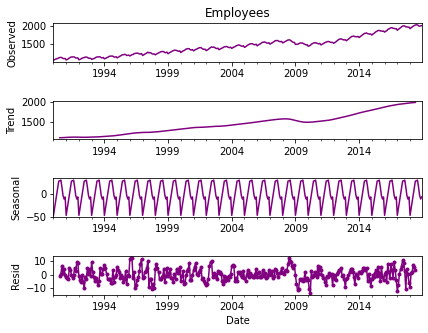

In [69]:
# Полученый результат декомпозиции
import matplotlib.pyplot as plt
decompos=seasonal_decompose(df['Employees'], model = 'additive')
fig, axes = plt.subplots(4, 1, sharex=False, figsize=(6.6,5))
plt.subplots_adjust(hspace=1)
decompos.observed.plot(ax=axes[0], color='purple', ylabel='Observed', xlabel ='', title='Employees')
decompos.trend.plot(ax=axes[1], color='purple', ylabel='Trend', xlabel ='')
decompos.seasonal.plot(ax=axes[2], color='purple', ylabel='Seasonal', xlabel ='')
decompos.resid.plot(ax=axes[3], color='purple', marker='.', ylabel='Resid');

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [70]:
# Подсказка: используйте auto_arima

# m=12
auto_arima(df['Employees'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 06 Mar 2022   AIC                           2208.504
Time:                                      15:11:19   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
(ваш результат может отличаться)
### 4. Разделите данные на train/test 
Установите один (последний) год (12 записей) для тестирования. Есть несколько способов сделать это!

In [95]:
train = df.iloc[:len(df)-12] # Обучающая выборка. Берем все значения за исклюением 12 последних
test = df.iloc[len(df)-12:]  # Тестовая выборка. Берем последние 12 значений

print ('\033[1m' + 'Обучающая выборка' + '\033[0m', '\n')
print (train, '\n')
print ('\033[1m' + 'Тестовая выборка' + '\033[0m', '\n')
print (test)

Обучающая выборка 

            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7
...               ...
2017-08-01     1989.9
2017-09-01     1964.9
2017-10-01     1965.2
2017-11-01     1956.6
2017-12-01     1957.2

[336 rows x 1 columns] 

Тестовая выборка 

            Employees
Date                 
2018-01-01     1916.8
2018-02-01     1944.5
2018-03-01     1962.2
2018-04-01     1984.9
2018-05-01     2001.5
2018-06-01     2015.3
2018-07-01     2022.1
2018-08-01     2019.1
2018-09-01     1992.5
2018-10-01     1984.3
2018-11-01     1990.1
2018-12-01     2000.2


In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train['Employees']

In [74]:
# Модель SARIMA(1, 1, 2)(1, 0, 1, 12)
model = SARIMAX (train ['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12))              
results = model.fit()   
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 06 Mar 2022   AIC                           2128.116
Time:                                      15:14:24   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.288      0.000       0.839       1.009
ma.L1         -0.9583      0.071    -13.552      0.000      -1.097      -0.820
ma.L2          0.1496      0.061      2.446      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    731.133      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.153      0.000      -0.838      -0.666
sigma2        28.7706      1.685     17.073      0.000      25.468      32.074
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [105]:
# Модель SARIMA(1, 1, 2)(1, 0, 1, 12)
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1, 1, 2)(1, 0, 1, 12) Predictions')

print ('\033[1m' + 'Прогнозируемые значения для адаптации модели' + '\033[0m', '\n')
print (predictions)

Прогнозируемые значения для адаптации модели 

Date
2018-01-01    1922.286759
2018-02-01    1936.557254
2018-03-01    1961.816354
2018-04-01    1985.939956
2018-05-01    2005.009398
2018-06-01    2018.340096
2018-07-01    2022.070700
2018-08-01    2023.528886
2018-09-01    2000.322268
2018-10-01    1986.721839
2018-11-01    1974.579014
2018-12-01    1991.722244
Freq: MS, Name: SARIMA(1, 1, 2)(1, 0, 1, 12) Predictions, dtype: float64


### 7. Нарисуйте графики прогнозируемых и известных значений


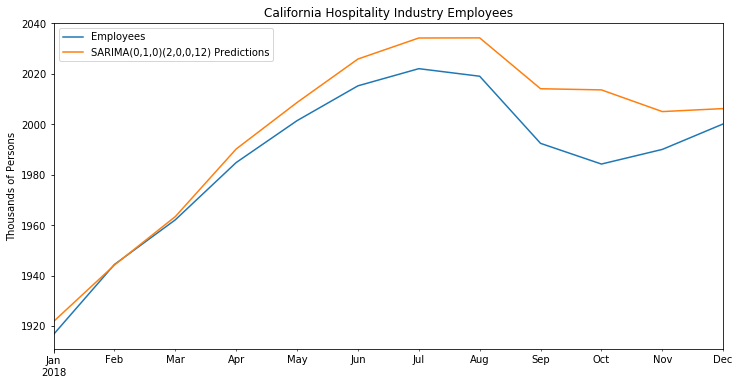

In [ ]:
# ваш код

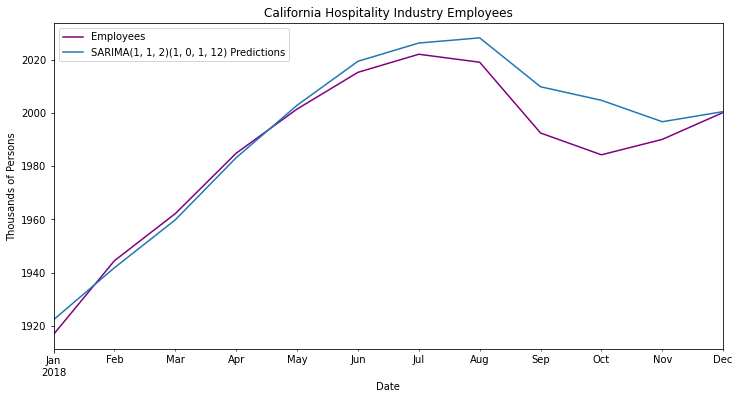

In [78]:
# На графике представлены значения тестовой выборки и прогнозируемые значения
df1=test['Employees'].plot(figsize=(12,6), title='California Hospitality Industry Employees', ylabel='Thousands of Persons', legend=True, color='purple')
predictions.plot(legend=True);
df1.autoscale(axis='x', tight=True)

### 8. Оцените качество модели с помощью MSE и RMSE


In [80]:
# Подсказка: используйте функции mean_squared_error и rmse 

from sklearn.metrics import mean_squared_error  # метрики
from statsmodels.tools.eval_measures import rmse  # метрики

mse_value = mean_squared_error(test['Employees'], predictions)  
rmse_value = rmse (test['Employees'], predictions)

print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {mse_value:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {rmse_value:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.67620142
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.813410317


In [ ]:
# ваш код

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [ ]:
model = [ваш код]
results = model.fit()
results.summary()

/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 07 Mar 2021   AIC                           2208.504
Time:                                      09:53:02   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.473      0.000       0.836       1.013
ma.L1         -0.9440      0.069    -13.765      0.000      -1.078      -0.810
ma.L2          0.1286      0.058      2.212      0.027       0.015       0.243
ar.S.L12       0.9972      0.001    702.406      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.340      0.000      -0.834      -0.664
sigma2        29.2968      1.717     17.062      0.000      25.931      32.662
===================================================================================
Ljung-Box (Q):                       31.48   Jarque-Bera (JB):                67.46
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
# Обучаем модель на полном датасете
# Модель SARIMA(1, 1, 2)(1, 0, 1, 12)
model = SARIMAX (df['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 06 Mar 2022   AIC                           2208.504
Time:                                      15:30:13   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
# Предсказание на год вперед. Для прогнозирования используйте с нужными параметрами results.predict() -- см. выше
fcast = results.predict(len(df)-1, len(df)+11, typ='levels').rename('SARIMA(1, 1, 2)(1, 0, 1, 12) Forecast')  

print ('\033[1m' + 'Прогнозируемые значения на год вперед' + '\033[0m', '\n')
print (fcast)

Прогнозируемые значения на год вперед 

2018-12-01    1991.722244
2019-01-01    1963.876814
2019-02-01    1986.819686
2019-03-01    2006.001894
2019-04-01    2030.338390
2019-05-01    2050.319690
2019-06-01    2067.145786
2019-07-01    2074.926987
2019-08-01    2076.491163
2019-09-01    2056.901820
2019-10-01    2051.847051
2019-11-01    2047.934254
2019-12-01    2053.899973
Freq: MS, Name: SARIMA(1, 1, 2)(1, 0, 1, 12) Forecast, dtype: float64


### 10. Постройте график предсказаний и график исходных данных


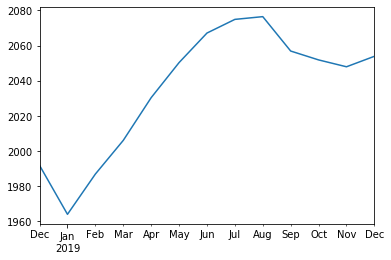

In [ ]:
fcast.plot()

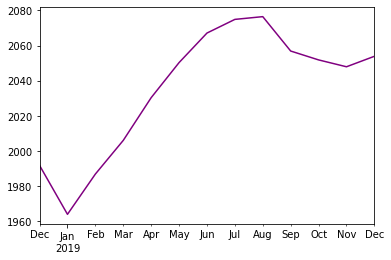

In [109]:
# График предсказаний 
fcast.plot(color='purple');

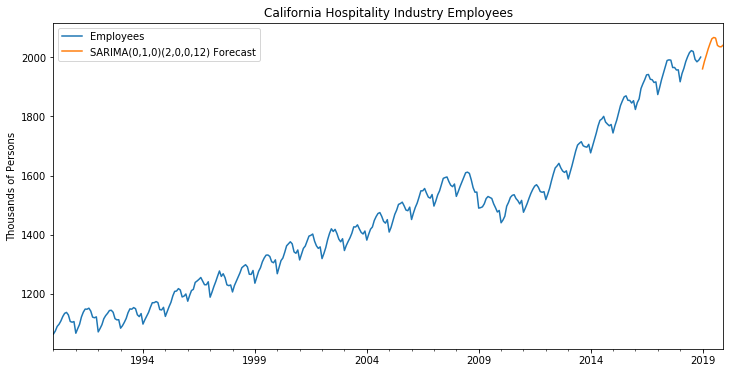

In [ ]:
# отобразите общий график

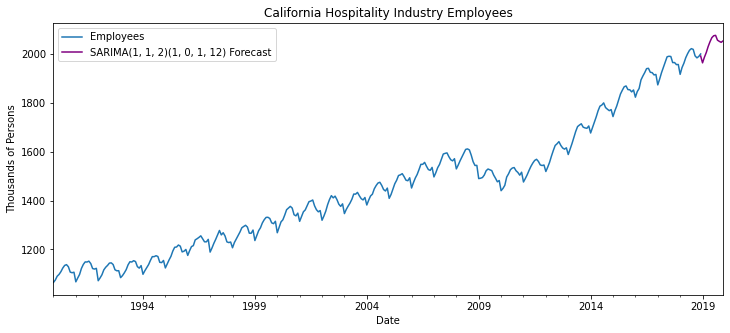

In [112]:
# График исходных данных с прогнозным годом
df1=df['Employees'].plot(figsize=(12,5), title='California Hospitality Industry Employees', ylabel='Thousands of Persons', legend=True)
fcast.plot(legend=True, color='purple');